In [1]:
import subprocess
import io

import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib.colors import LogNorm

In [2]:
def getFitsCutout(fitsfile, x=500, y=500, npix=200):
    """
    Get a cutout from a single FITS file by running fitscut
     
    Returns astropy fits object 
    """
 
    cmd = "fitscut -x {} -y {} -r {} -c {} {}".format(x,y,npix,npix,fitsfile)
    
    process = subprocess.run(cmd.split(),stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    
    # add error checking here
    
    fitscutout = fits.open(io.BytesIO(process.stdout))
    
    return fitscutout

In [3]:
fitsCutout = getFitsCutout('/Volumes/Tess/ffi/2019/130/1-1/tess2019130230826-1-1-0016-s_ffic.fits')

In [4]:
fitsCutout.info()

Filename: <class '_io.BytesIO'>
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     146   (200, 200)   float32   


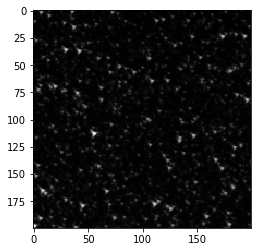

In [5]:
plt.imshow(fitsCutout[0].data, cmap="gray", norm=LogNorm())